### MHW OSTIA SST 2007-2023

### Info

- Type: Fleeting (Attempt #1)
- Product ID: SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
- Product Name: Global Ocean OSTIA Sea Surface Temperature and Sea Ice Analysis
- Dataset: METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
- Variables: Sea surface foundation temperature analysed_sst [K]
- Date Range: 01/01/2007-06/21/2023
- Area of Interest: 36.310634447737435 N, -22.970278603850662 W, 29.666604725105362 S, -10.440505159539091 E

### Python Modules

In [46]:
# to avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob 
import datetime
import pandas as pd

# load marineHeatWaves definition module
import marineHeatWaves as mhw

### Open product

In [6]:
# open netCDF
ds=xr.open_dataset('/Users/alex.oprea/Desktop/Marine Heat Wave Test/data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1687509768830.nc')

# check product's variables
ds

<xarray.Dataset>
Dimensions:       (lon: 252, time: 6016, lat: 134)
Coordinates:
  * lon           (lon) float32 -22.98 -22.92 -22.88 ... -10.52 -10.48 -10.43
  * time          (time) datetime64[ns] 2007-01-01T12:00:00 ... 2023-06-21T12...
  * lat           (lat) float32 29.67 29.73 29.77 29.83 ... 36.22 36.28 36.33
Data variables:
    analysed_sst  (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

Dataset contains a single variable `analysed_sst` in Kelvin which depends on three dimensions:

- time (a value per day)
- lon
- lat

As it may be more practical to work with $^{\circ}$C, we have to convert `analysed_sst` from Kelvin to celsius and add a new variable to our dataset `ds`:

In [7]:
# conversion from K to C
ds=ds.assign(analysed_sst_C=ds['analysed_sst']-273.15)
# add attributes to the new variable
ds['analysed_sst_C']=ds['analysed_sst_C'].assign_attrs({'long_name': 'analysed sea surface temperature',
                                                        'units':'celsius',
                                                        'comment':'analysed_sst_C=analysed_SST-273.15'})
# check variables
ds

<xarray.Dataset>
Dimensions:         (lon: 252, time: 6016, lat: 134)
Coordinates:
  * lon             (lon) float32 -22.98 -22.92 -22.88 ... -10.52 -10.48 -10.43
  * time            (time) datetime64[ns] 2007-01-01T12:00:00 ... 2023-06-21T...
  * lat             (lat) float32 29.67 29.73 29.77 29.83 ... 36.22 36.28 36.33
Data variables:
    analysed_sst    (time, lat, lon) float32 293.9 293.9 294.0 ... 295.0 295.0
    analysed_sst_C  (time, lat, lon) float32 20.76 20.79 20.81 ... 21.83 21.83
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In order to better visualize the geographic hold of the product, we have to plot one frame

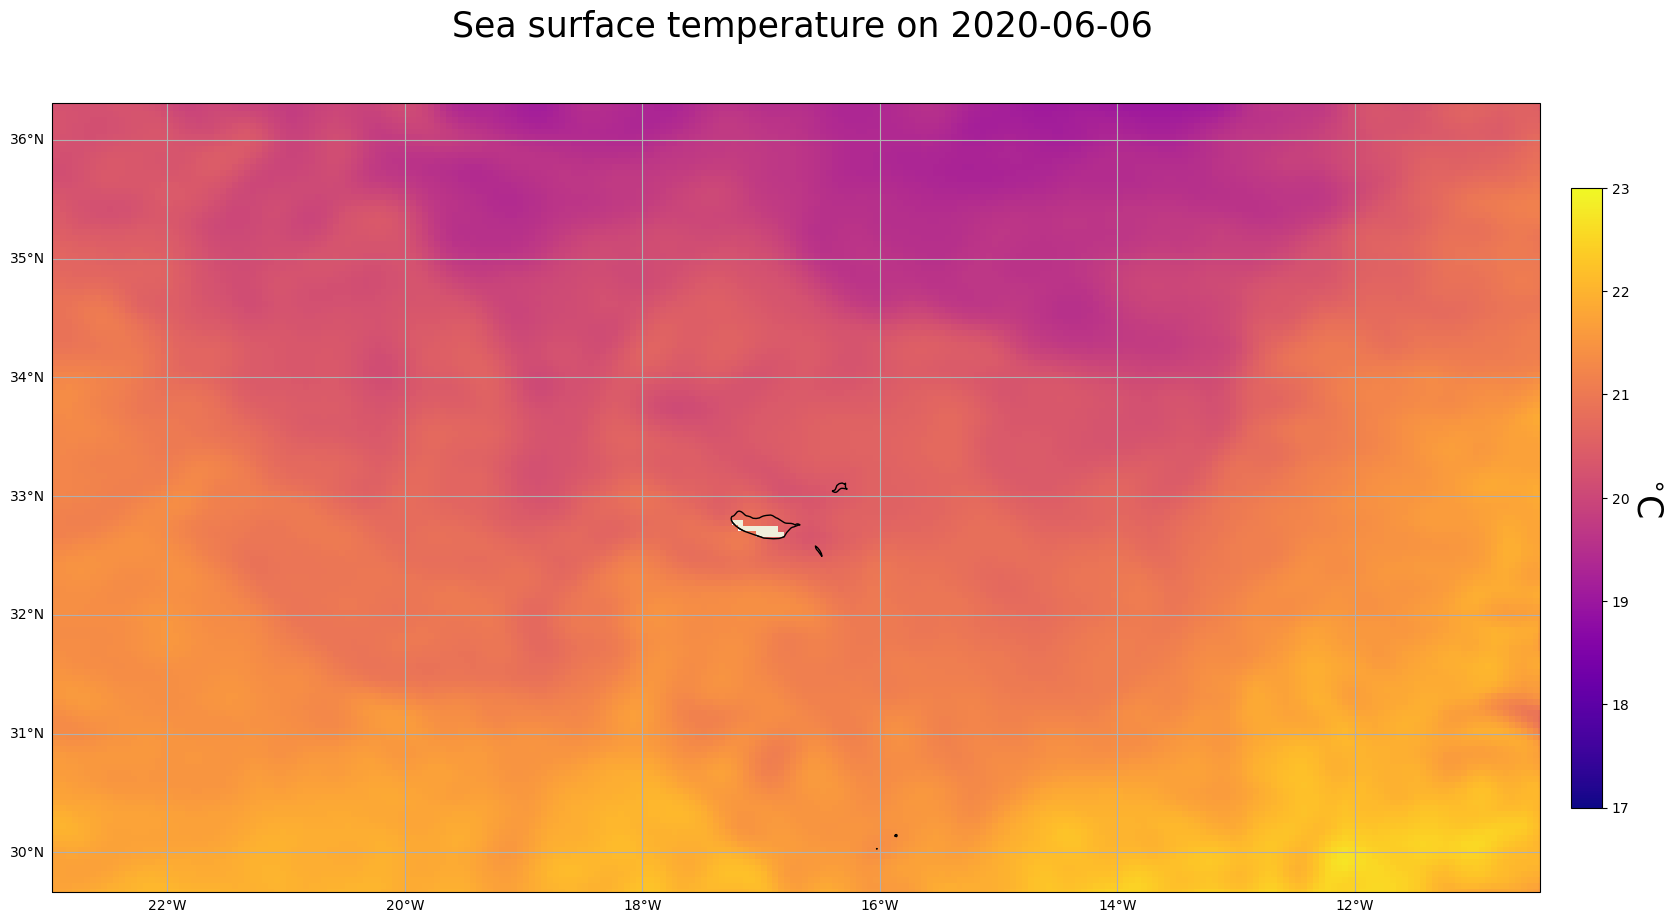

In [14]:
# select temperature parameter, at the date and depth we want, store it
# define a date and time available in the product
date_plot='2020-06-06'
temp_map = ds['analysed_sst_C'].sel(time=date_plot).squeeze()

# define the caracteristics of the plot
f = plt.figure(figsize=(20,16))                              # create fig & def size
ax = plt.axes(projection=ccrs.PlateCarree())                 # create ax & projection of the map
ax.coastlines()                                              # add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)  # add long and lat lines
gl.right_labels = False                                      # remove lat labels right
gl.top_labels = False                                        # remove long labels top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor= 'k')      # add land mask

# Define the extent to focus on the Madeira region
extent = [-22.970278603850662, -10.440505159539091, 29.666604725105362, 36.310634447737435]  # [lon_min, lon_max, lat_min, lat_max]

ax.set_extent(extent, crs=ccrs.PlateCarree())                # def map extent

# plot the SST, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['lon'].data, temp_map['lat'].data, temp_map, vmin=17, vmax=23, cmap='plasma')

# add titles and legend
f.suptitle('Sea surface temperature on {}'.format(date_plot), fontsize=25, y=0.8)
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)
cbar.set_label('$^{\circ}$C', rotation=270, fontsize=25, labelpad=25)

# save figure
plt.savefig('temp_map.png')

For studying MHWs, we are interested in time series longer than 5 years. Hobday et al., recommends to consider a time series of at least 30 years. In order to simplify this case study and shorten the computing series, ~20 years would be more than viable. The next part is for opening multiple netCDF files at the same time (which is not the case for a fleeting attempt).

### Open multiple SST observation products + mix

First, we collect all netCDF `.nc` file names in our `data/` directory.


In [16]:
# define data directory
data_dir='data/'

# collect all netCDF file names in the data directory
filenames=glob.glob(data_dir+'*.nc')

# check the variable
filenames

['data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1687509768830.nc']

Now let's use the open_mfdataset function of xarray to simultaneously open the files. Before opening each file, we will apply a simple preprocessing function which will consist in converting the `analysed_sst` DataArray from Kelvin to Celsius

In [17]:
def preprocess(ds):
    '''Convert the analysed_sst variable from K to C'''
    ds['analysed_sst']=ds['analysed_sst']-273.15
    ds['analysed_sst']=ds['analysed_sst'].assign_attrs({'units':'Celsius'})
    return ds

In [18]:
# concatenate the SST time series into a big SST time series and convert from K to C
ds_all=xr.open_mfdataset(filenames,preprocess=preprocess)

# check output
ds_all

<xarray.Dataset>
Dimensions:       (lon: 252, time: 6016, lat: 134)
Coordinates:
  * lon           (lon) float32 -22.98 -22.92 -22.88 ... -10.52 -10.48 -10.43
  * time          (time) datetime64[ns] 2007-01-01T12:00:00 ... 2023-06-21T12...
  * lat           (lat) float32 29.67 29.73 29.77 29.83 ... 36.22 36.28 36.33
Data variables:
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(6016, 134, 252), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

As you can see, the `analysed_sst` variable is split into chunks which is not the `DataArray` structure we are used to. In order to work more conveniently with the file and to speed up the processing, we are going to export our intermediate output, the concatenated time series as a netCDF file. Be patient as this operation may take a few minutes :)

In [27]:
export_path=data_dir+'time_series/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_2007_2023.nc'

In [28]:
# export concatenated dataset in a netCDF file
ds_all.to_netcdf(path=export_path)

# close the dataset
ds_all.close()

The new SST time series as a new xarray dataset can be opened

In [29]:
# open the new time series
ds_20y = xr.open_dataset(export_path, engine='netcdf4')

# check on the product's variables
ds_20y

<xarray.Dataset>
Dimensions:       (lon: 252, time: 6016, lat: 134)
Coordinates:
  * lon           (lon) float32 -22.98 -22.92 -22.88 ... -10.52 -10.48 -10.43
  * time          (time) datetime64[ns] 2007-01-01T12:00:00 ... 2023-06-21T12...
  * lat           (lat) float32 29.67 29.73 29.77 29.83 ... 36.22 36.28 36.33
Data variables:
    analysed_sst  (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

We have now 17 years if daily SST values over the Madeira region, concatenated in a single netCDF and a single xr.DataSet. Next step is detecting the MHW events.

## Detect and characterize MHWs in the Madeira region

To detect and characterize the MHWs, we will work with the `marineHeatWaves.py` python module which consists in several functions. The main one is the mhw.detect() function and it applies the *Hobday et al. (2016) marine heat wave definition to an input time series of temp ('temp') along with a time vector ('t'). It outputs properties of all detected marine heat waves.* These properties include the start and end date of the event, the maximum and mean intensity of the event etc. More information about the inputs, outputs and processes can be found on GitHub.

As the mhw.detect() function takes as input two 1D arrays (t and temp), we will need to perform some additional pre-processing on our ~17 year SST time series. Indeed, for now, we do have a 1D array of date (`time` dimension of the product) but a 3D array of SST (`analysed_sst` which depends on `(time,lon,lat)`. As a consequence we are going to average the SST values over the full Madeira region and we will hence identify the time periods where the area as a whole experienced a MHW event.

### SST spatial avg & time vector formating

Let's firstly spatially average our SST time series. As it spans over 15 years, the processing may take a few minutes. 

In [32]:
# spatially average the SST over the full region
ds_20y_avg=ds_20y['analysed_sst'].mean(dim=["lon","lat"],skipna=True)

# display the results
ds_20y_avg

<xarray.DataArray 'analysed_sst' (time: 6016)>
array([19.03189 , 18.944178, 19.220001, ..., 22.40385 , 22.606314,
       22.69734 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01T12:00:00 ... 2023-06-21T12:00:00

Gathering the dates and the temperature in 1D arrays

In [33]:
# collect the mean SST over the region in a np array
temp=ds_20y_avg.data

# collect the time values in a 1D array and convert the precision from ns to D
date=ds_20y_avg['time'].data.astype('datetime64[D]')

# check date array
date

array(['2007-01-01', '2007-01-02', '2007-01-03', ..., '2023-06-19',
       '2023-06-20', '2023-06-21'], dtype='datetime64[D]')

As it can be seen, the date array is of type np.datetime64. The `mhw.detect()` function expects datetime.date() objects. Convert the date array from np.datetime64 to datetime.date():

In [34]:
# convert from np.datetime64 to datetime.date()
date_datetime=date.tolist()

# finally convert to ordinal (number of days since January 1st of year 1) and store it in a np array as required by the mhw.detect() function
date_datetime_ordinal= np.array([datetime.date.toordinal(tt) for tt in date_datetime])

#display the first 10 elements of the converted array
date_datetime_ordinal[0:10]

array([732677, 732678, 732679, 732680, 732681, 732682, 732683, 732684,
       732685, 732686])

Now the inputs are well formatted to be used in the mhw.detect() function.

### MHWs detection for the entire basin

use the mhw.detect() function on the time and temp 1D array. We are working on avg SST.

In [35]:
# mhw.detect() outputs the list of MHW even over our time period along with their characteristics
# it also outputs a climatology relative to which the MHW is defined
mhws, clim =mhw.detect(date_datetime_ordinal, temp)

In [37]:
# show contents of the first output
mhws.keys()

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events'])

In [38]:
# show contents of the second output
clim.keys()

dict_keys(['thresh', 'seas', 'missing'])

As it can be seen, the output variables contain many information describing the MHWs identified. You can also find their description on gihub. Let's check the number if MHW events detected during our time period.

In [39]:
#n_events keys give the number of MHW during our time period
print ('There has been {} detected MHW events in the Madeira region between {} and {}'.format(mhws['n_events'],date[0],date[-1]))

There has been 26 detected MHW events in the Madeira region between 2007-01-01 and 2023-06-21


Let's find out which event was the most important one. You can also find such an example in the jupyter notebook in the MHW python modlue github.

In [40]:
# find largest event
ev = np.argmax(mhws['intensity_max'])

# print characteristics of the event
print('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C above the threshold')
print('Average intensity:', mhws['intensity_mean'][ev], 'deg. C above the threshold')
print('Duration:', mhws['duration'][ev], 'days')
print('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 1.8820662344655688 deg. C above the threshold
Average intensity: 1.1129140186669393 deg. C above the threshold
Duration: 77 days
Start date: 03 March 2023
End date: 18 May 2023


This is a bit unexpected. Personally, I wouldn't have expected to spot a MHW lasting 2 months this year... 

Let's analyze this MHW event.

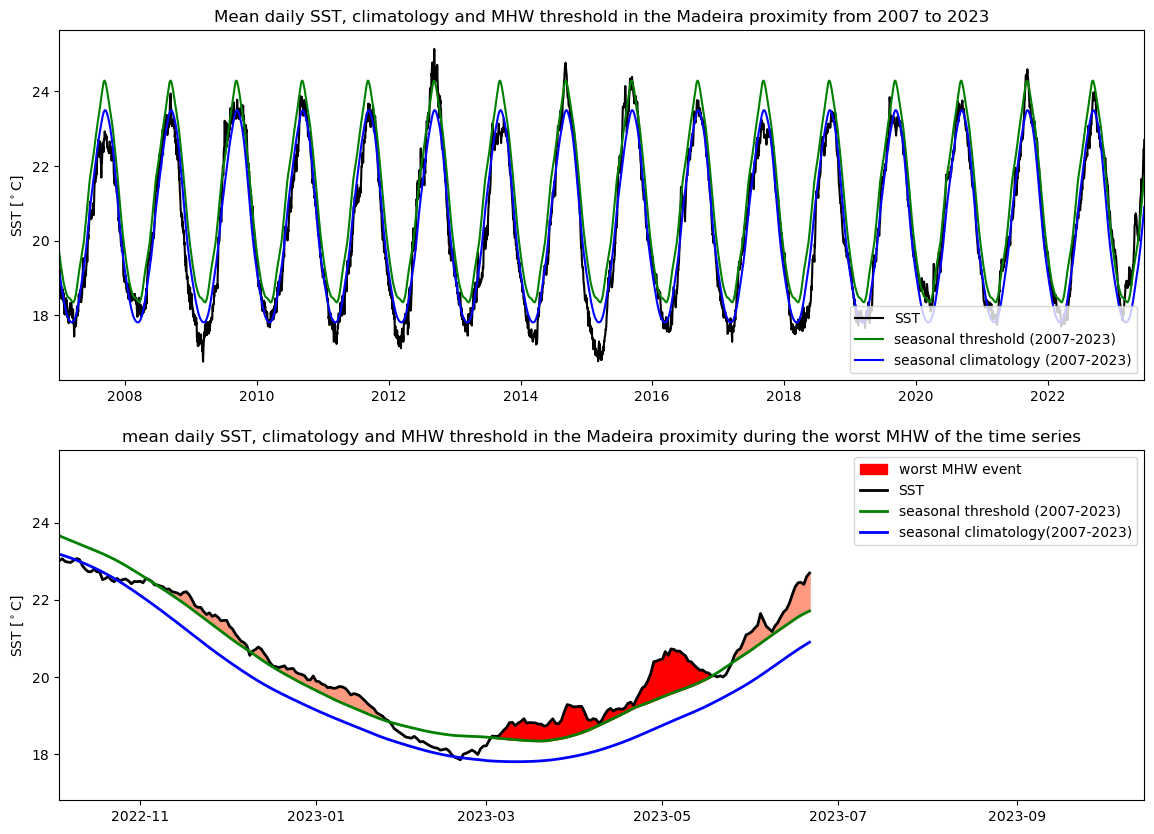

In [49]:
# create the figure
fig,(axe1,axe2)=plt.subplots(2,1,figsize=(14,10))

### first subplot
# plot SST, seasonal cycle, and threshold
# SST
axe1.plot(date,temp, 'k-', label='SST')
# climatology threshold (90th percentile)
axe1.plot(date, clim['thresh'], 'g-', label='seasonal threshold (2007-2023)')
# seasonal climatology 
axe1.plot(date, clim['seas'], '-b', label='seasonal climatology (2007-2023)')

# properties of the top ax
axe1.set_title('Mean daily SST, climatology and MHW threshold in the Madeira proximity from 2007 to 2023')
axe1.legend(loc= 'lower right')
axe1.set_xlim(date[0], date[-1])
axe1.set_ylim(temp.min()-0.5, temp.max()+0.5)
axe1.set_ylabel(r'SST [$^\circ$C]')


### second subplot
# find indices for all tem MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    try: 
        t1 = np.where(date_datetime_ordinal==mhws['time_start'][ev0])[0][0]
        t2 = np.where(date_datetime_ordinal==mhws['time_end'][ev0])[0][0]
        axe2.fill_between(date[t1:t2+1], temp[t1:t2+1], clim['thresh'][t1:t2+1], color=(1, 0.6, 0.5))
    
    except IndexError:
        # if indice lower than worst event, keep going
        if ev0<ev:
            ev0+=1
        else:
        # stop the for loop
            break
# find indices for MHW of interest and shade accordingly
t1=np.where(date_datetime_ordinal==mhws['time_start'][ev])[0][0]
t2=np.where(date_datetime_ordinal==mhws['time_end'][ev])[0][0]
axe2.fill_between(date[t1:t2+1], temp[t1:t2+1], clim['thresh'][t1:t2+1], color= 'r', label='worst MHW event')
# plot SST, seasonal cycle, threshold, shade MHWs with main event in red
axe2.plot(date,temp,'k-',linewidth=2, label='SST')
axe2.plot(date,clim['thresh'], 'g-', linewidth=2, label='seasonal threshold (2007-2023)')
axe2.plot(date,clim['seas'],'b-', linewidth=2, label='seasonal climatology(2007-2023)')

# properties of bottom ax
axe2.set_title('mean daily SST, climatology and MHW threshold in the Madeira proximity during the worst MHW of the time series')
axe2.legend()
axe2.set_xlim(date[t1]-np.timedelta64(150, 'D'), date[t2] + np.timedelta64(150, 'D'))
axe2.set_ylim(clim['seas'].min() -1, clim['seas'].max() + mhws['intensity_max'][ev] +0.5)
axe2.set_ylabel(r'SST [$^\circ$C]')
                  
# save fig
plt.savefig('SST_time_series_MHW.png')